<font size="+5">#05. Hiperparametros del Modelo</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Usamos una tabla del _[Respositorio de Datos de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/adult)_. Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: Si te interesa conocer el nombre de las variables, puedes ir al enlace de del repositorio.

```python
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()
```

> Copiamos y pegamos en la siguiente celda las líneas de código que aparecen justo arriba para descargar los datos de internet y almacenar la tabla en un `DataFrame` con el que trabajaremos durante la práctica.

In [2]:
###Prediction task is to determine whether a person makes over 50K a year. 
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

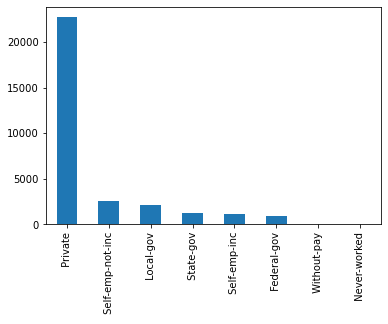

In [4]:
df[1].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='1'>

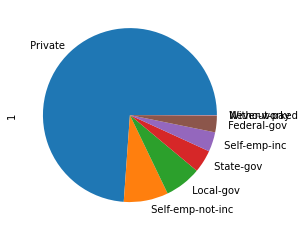

In [5]:
df[1].value_counts().plot(kind='pie')

In [2]:
df.count()

0         32561
1         30725
2         32561
3         32561
4         32561
5         32561
6         30718
7         32561
8         32561
9         32561
10        32561
11        32561
12        32561
13        31978
target    32561
dtype: int64

In [3]:
df.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.count()

0         30162
1         30162
2         30162
3         30162
4         30162
5         30162
6         30162
7         30162
8         30162
9         30162
10        30162
11        30162
12        30162
13        30162
target    30162
dtype: int64

In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [6]:
objetivo = df.iloc[:, -1]
explicativas = df.iloc[:, :-1]

# Entrenar Modelo `DecisionTreeClassifier()` por Defecto

> Usaremos los hiperparámetros que vienen por defecto (dejamos el paréntesis en blanco).

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(explicativas, objetivo, test_size=0.33, random_state=42)

In [9]:
X_train

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
30284,66,132055,9,0,1825,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8850,33,296453,14,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3807,23,194096,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13048,28,116372,13,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2969,27,85625,10,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,40,67852,9,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5875,41,120539,10,3103,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
935,37,176900,9,0,0,99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17056,56,51662,7,0,0,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
X_train.count()

0                      20208
2                      20208
4                      20208
10                     20208
11                     20208
                       ...  
13_ Thailand           20208
13_ Trinadad&Tobago    20208
13_ United-States      20208
13_ Vietnam            20208
13_ Yugoslavia         20208
Length: 96, dtype: int64

In [11]:
X_test.count()

0                      9954
2                      9954
4                      9954
10                     9954
11                     9954
                       ... 
13_ Thailand           9954
13_ Trinadad&Tobago    9954
13_ United-States      9954
13_ Vietnam            9954
13_ Yugoslavia         9954
Length: 96, dtype: int64

In [12]:
y_train

30284    1
8850     0
3807     0
13048    0
2969     0
        ..
32171    0
5875     1
935      1
17056    0
25528    0
Name: target_ >50K, Length: 20208, dtype: uint8

In [13]:
y_test

234      1
26879    0
19182    1
13485    0
9625     0
        ..
1977     0
32438    1
14826    0
16106    0
24035    0
Name: target_ >50K, Length: 9954, dtype: uint8

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(min_samples_leaf=15)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=15)

## Realidad vs Predicciones

> ¿Cómo de bueno es el modelo en los datos de **entrenamiento**?¿Y en los datos de **testeo**?

In [17]:
model.score(X_train, y_train)

0.8787114014251781

In [18]:
model.score(X_test, y_test)

0.8402652200120555

In [19]:
###OTRA FORMA DE HACERLO ES A TRAVÉS DE UNA FUNCIÓN: 

In [20]:
def calcular_precision(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = (y_pred == y_test).mean()

    return precision

In [45]:
dt = DecisionTreeClassifier(min_samples_leaf=15)

In [46]:
dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [47]:
calcular_precision(dt)

0.8409684548925055

In [48]:
dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 96,
 'n_features_': 96,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=uint8),
 'n_classes_': 2,
 'max_features_': 96,
 'tree_': <sklearn.tree._tree.Tree at 0x7fcf69118dc0>}

In [42]:
model.score(X_train, y_train)

0.8787114014251781

In [43]:
model.score(X_test, y_test)

0.8402652200120555

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

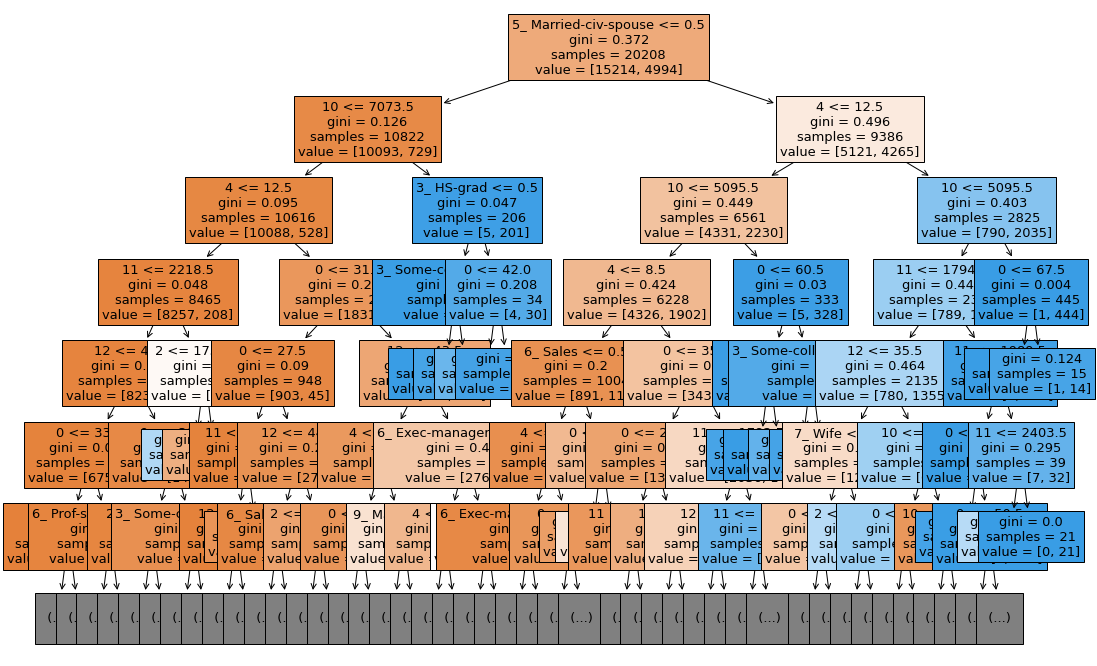

In [29]:
plt.figure(figsize=(18,12))
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True, fontsize=13, max_depth=6);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?

In [30]:
import numpy as np ###aquí no entiendo que estoy haciendo

model.predict_proba(X_train)

model.predict_proba(X_train.loc[120].values.reshape(1,-1))

np.where(model.predict_proba(X_train)[:, 1]> 0.5, 1, 0)

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
X_train.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
30284,66,132055,9,0,1825,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8850,33,296453,14,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3807,23,194096,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13048,28,116372,13,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2969,27,85625,10,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
type(3)

int

In [34]:
type('weiof')

str

In [35]:
type(X_train)

pandas.core.frame.DataFrame

In [36]:
X_train.fit()

AttributeError: 'DataFrame' object has no attribute 'fit'

In [ ]:
model.fit()

In [38]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

In [39]:
df.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index([                               0,                                2,
                                       4,                               10,
                                      11,                               12,
                          '1_ Local-gov',                     '1_ Private',
                       '1_ Self-emp-inc',            '1_ Self-emp-not-inc',
                          '1_ State-gov',                 '1_ Without-pay',
                               '3_ 11th',                        '3_ 12th',
                            '3_ 1st-4th',                     '3_ 5th-6th',
                            '3_ 7th-8th',                         '3_ 9th',
                         '3_ Assoc-acdm',                   '3_ Assoc-voc',
                          '3_ Bachelors',                   '3_ Doctorate',
                            '3_ HS-grad',                     '3_ Masters',
                          '3_ Preschool'

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.__dict__

In [37]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 96,
 'n_features_': 96,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=uint8),
 'n_classes_': 2,
 'max_features_': 96,
 'tree_': <sklearn.tree._tree.Tree at 0x7fcf5abdff80>}

In [49]:
juana = X_train.sample()

In [76]:
X_train

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
30284,66,132055,9,0,1825,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8850,33,296453,14,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3807,23,194096,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13048,28,116372,13,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2969,27,85625,10,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,40,67852,9,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5875,41,120539,10,3103,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
935,37,176900,9,0,0,99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17056,56,51662,7,0,0,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
juana

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
68,49,191681,10,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
predict()

NameError: name 'predict' is not defined

In [52]:
'juana'

'juana'

In [53]:
juana

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
68,49,191681,10,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
model.predict_proba(juana)

array([[0.09090909, 0.90909091]])

In [55]:
prob = model.predict_proba(juana)

In [61]:
prob[0,1] > 0.5

True

In [63]:
prob

array([[0.09090909, 0.90909091]])

In [65]:
prob[0,1]

0.9090909090909091

In [60]:
prob[0,1] > 0.5

True

In [67]:
import numpy as np

In [69]:
prob = model.predict_proba(X_train)

In [70]:
prob

array([[0.        , 1.        ],
       [0.63157895, 0.36842105],
       [1.        , 0.        ],
       ...,
       [0.92307692, 0.07692308],
       [0.72222222, 0.27777778],
       [0.41176471, 0.58823529]])

In [72]:
classification = np.where(prob[:,1] > 0.5, 1, 0)

In [74]:
classification == y_train

30284     True
8850      True
3807      True
13048     True
2969      True
         ...  
32171     True
5875     False
935      False
17056     True
25528    False
Name: target_ >50K, Length: 20208, dtype: bool

In [75]:
(classification == y_train).mean()

0.8787114014251781

In [77]:
probabilidad = 0.34

In [78]:
def calc_clase(probabilidad):
    if probabilidad > 0.5:
        return 1
    else:
        return 0

In [83]:
pd.DataFrame(prob)[1]

0        1.000000
1        0.368421
2        0.000000
3        0.000000
4        0.000000
           ...   
20203    0.000000
20204    0.400000
20205    0.076923
20206    0.277778
20207    0.588235
Name: 1, Length: 20208, dtype: float64

In [83]:
pd.DataFrame(prob)[1].apply(calc_clase)

0        1.000000
1        0.368421
2        0.000000
3        0.000000
4        0.000000
           ...   
20203    0.000000
20204    0.400000
20205    0.076923
20206    0.277778
20207    0.588235
Name: 1, Length: 20208, dtype: float64

In [66]:

df

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Entrenar Modelo `DecisionTreeClassifier()` con Diferentes Hiperparámetros

> - Debemos emplear el **objeto** `GridSearchCV()` para encontrar los mejores Hiperparámetros que nos den mejores resultados en datos que el modelo no conocía: enl los datos de testeo.
>
> Si queremos ver los hiperparámetros del modelo, ejecutaremos: `model.get_params()`
>
> Si queremos ver los posibles valores que deben tener los hiperpámetros, podemos ver la ayuda `shift + tab` sobre el paréntesis del objeto `DecisionTreeClassifier()`.

In [58]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [84]:
dt = DecisionTreeClassifier()

In [85]:
from sklearn.model_selection import GridSearchCV

In [90]:
cv = GridSearchCV(estimator=dt, param_grid={'min_samples_leaf':[15, 30, 50, 80, 100],
                                           'max_depth': [3,5,10, None]}, verbose=2)

In [91]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...................max_depth=3, min_samples_leaf=15; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...................max_depth=3, min_sa

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [15, 30, 50, 80, 100]},
             verbose=2)

In [92]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [93]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

## Realidad vs Predicciones

> ¿Cómo de bueno es el modelo en los datos de **entrenamiento**?¿Y en los datos de **testeo**?

In [100]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [101]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [102]:
dt.score(X_train, y_train)

0.860055423594616

In [103]:
dt.score(X_test, y_test)

0.8502109704641351

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

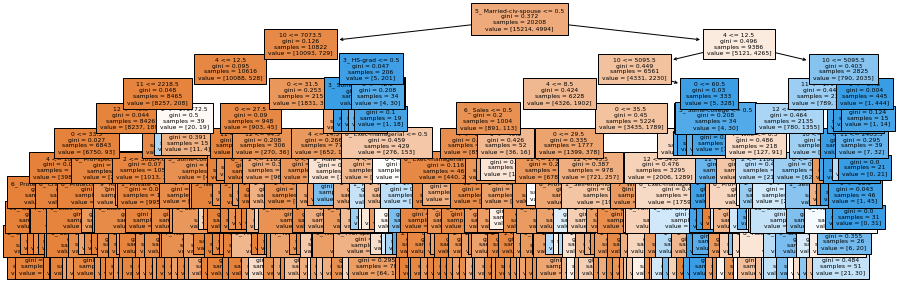

In [107]:
plt.figure(figsize=(15,5))
plot_tree(decision_tree=dt, feature_names=X_train.columns, filled=True, fontsize=6);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?¿Por qué ha cambiado tanto la precisión en los datos de testeo al haber usado diferentes hiperparámetros?

In [ ]:
#overfitting (sobre entrenamiento de los datos) El modelo ha mejorado con la optimización del hiperparámetro
#min_samples_leaf (50)

# Configurar Hiperparámetros de Otros Modelos

## K Nearest Neighbours

> Aquí tan solo debemos configurar el número K de vecinos a tener en cuenta.

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
KN = KNeighborsClassifier()

In [111]:
model

DecisionTreeClassifier(min_samples_leaf=15)

In [116]:
KN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
KN

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()

In [127]:
X_train = scaler.fit_transform(X_train)

In [128]:
X_test = scaler.fit_transform(X_test)

In [129]:
cv_kn = GridSearchCV(estimator=KN, param_grid={'n_neighbors': [5, 10, 15, 20, 30]}, verbose=2)

In [130]:
cv_kn.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=5; total time=   1.2s
[CV] END ......................................n_neighbors=5; total time=   1.3s
[CV] END ......................................n_neighbors=5; total time=   1.2s
[CV] END ......................................n_neighbors=5; total time=   1.3s
[CV] END ......................................n_neighbors=5; total time=   1.2s
[CV] END .....................................n_neighbors=10; total time=   1.1s
[CV] END .....................................n_neighbors=10; total time=   1.2s
[CV] END .....................................n_neighbors=10; total time=   1.2s
[CV] END .....................................n_neighbors=10; total time=   1.3s
[CV] END .....................................n_neighbors=10; total time=   1.2s
[CV] END .....................................n_neighbors=15; total time=   1.2s
[CV] END .....................................n_n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 30]}, verbose=2)

## Support Vector Machines

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=efR1C6CvhmE
>
> Además de un script en Internet:
>
> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
>
> Cambiad tan solo los hiperparámetros del coste `C` y el tipo de `kernel`. En el último enlace veréis los posibles valores con los que podemos jugar. Además, podréis ver qué significan cada uno de los hiperparámetros solicitando ayuda con `shift + tab`.

In [133]:
from sklearn.svm import SVC

In [134]:
sv = SVC()

In [135]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [136]:
cv_sv = GridSearchCV(estimator=sv, param_grid={'C': [0.1, 1, 10],
                                              'kernel': ['rbf', 'linear', 'sigmoid']})

In [137]:
cv_sv.fit(X_train, y_train)


KeyboardInterrupt



# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender la importancia de la precisión de nuestro modelo en datos con los que no ha sido entrenado para evitar el sobreentrenamiento (**Ovefitting**).
- [ ] Entender qué significan los hiperparámetros y cómo pueden llegar a modificar un modelo.
- [ ] Importancia de la **aleatoriedad** como pieza fundamental de la estadística porque reduce el sesgo.

In [143]:
pd.concat([pd.DataFrame(X_test), pd.DataFrame(X_train)], axis=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0.150685,0.046545,0.933333,0.00000,0.0,0.551020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.328767,0.121760,0.533333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.493151,0.204733,0.533333,0.00000,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.191781,0.149020,0.533333,0.00000,0.0,0.448980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.129340,0.800000,0.00000,0.0,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20203,0.315068,0.036041,0.533333,0.00000,0.0,0.346939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20204,0.328767,0.071887,0.600000,0.03103,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20205,0.273973,0.110232,0.533333,0.00000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20206,0.534247,0.025026,0.400000,0.00000,

In [138]:
X_train

array([[0.67123288, 0.07972163, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.21917808, 0.19157016, 0.86666667, ..., 1.        , 0.        ,
        0.        ],
       [0.08219178, 0.12193136, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2739726 , 0.11023202, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.53424658, 0.02502607, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.50684932, 0.1234499 , 0.8       , ..., 0.        , 0.        ,
        0.        ]])